# Running Imports

In [1]:
import os
os.chdir('/home/jupyter/ee_tree_counting/Models/RetinaNet')

In [2]:
from config import (
    DEVICE,
    NUM_CLASSES,
    NUM_EPOCHS,
    OUT_DIR,
    VISUALIZE_TRANSFORMED_IMAGES,
    NUM_WORKERS,
    RESIZE_TO,
    VALID_DIR,
    TRAIN_DIR,
    CLASSES,
    WEIGHTS_PATH
)
from RetinaNet import create_model
from custom_utils import (
    Averager,
    SaveBestModel,
    save_model,
    save_loss_plot,
    save_mAP
)
from tqdm.auto import tqdm
from Datasets import (
    CustomDataset,
    create_train_dataset,
    create_valid_dataset,
    create_train_loader,
    create_valid_loader
)
from torchmetrics.detection.mean_ap import MeanAveragePrecision
from torch.optim.lr_scheduler import StepLR

import torch
import matplotlib.pyplot as plt
import time
import os

from torch.cuda.amp import GradScaler, autocast
from tqdm.notebook import tqdm

plt.style.use('ggplot')

seed = 42
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)

In [3]:
# Function for running training iterations.
def train(train_data_loader, model):
    print('Training')
    model.train()

    # initialize tqdm progress bar
    prog_bar = tqdm(train_data_loader, total=len(train_data_loader))

    for i, data in enumerate(prog_bar):
        optimizer.zero_grad()
        images, targets = data

        images = list(image.to(DEVICE) for image in images)
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]
        loss_dict = model(images, targets)

        losses = sum(loss for loss in loss_dict.values())
        loss_value = losses.item()

        train_loss_hist.send(loss_value)

        losses.backward()
        optimizer.step()

        # update the loss value beside the progress bar for each iteration
        prog_bar.set_description(desc=f"Loss: {loss_value:.4f}")
    return loss_value


In [4]:
# Function for running validation iterations.
def validate(valid_data_loader, model):
    print('Validating')
    model.eval()

    # Initialize tqdm progress bar.
    prog_bar = tqdm(valid_data_loader, total=len(valid_data_loader))
    target = []
    preds = []
    for i, data in enumerate(prog_bar):
        images, targets = data

        images = list(image.to(DEVICE) for image in images)
        targets = [{k: v.to(DEVICE) for k, v in t.items()} for t in targets]

        with torch.no_grad():
            outputs = model(images, targets)

        # For mAP calculation using Torchmetrics.
        for i in range(len(images)):
            true_dict = dict()
            preds_dict = dict()
            true_dict['boxes'] = targets[i]['boxes'].detach().cpu()
            true_dict['labels'] = targets[i]['labels'].detach().cpu()
            preds_dict['boxes'] = outputs[i]['boxes'].detach().cpu()
            preds_dict['scores'] = outputs[i]['scores'].detach().cpu()
            preds_dict['labels'] = outputs[i]['labels'].detach().cpu()
            preds.append(preds_dict)
            target.append(true_dict)

    metric.reset()
    metric.update(preds, target)
    metric_summary = metric.compute()
    return metric_summary



/opt/conda/lib/python3.10/site-packages/albumentations/core/composition.py:156: UserWarning: Got processor for bboxes, but no transform to process it.
  self._set_keys()


Number of training samples: 379
Number of validation samples: 59

36,352,630 total parameters.
36,352,630 training parameters.
Adjusting learning rate of group 0 to 1.0000e-03.

EPOCH 1 of 7
Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/14 [00:00<?, ?it/s]

/opt/conda/lib/python3.10/site-packages/torchmetrics/utilities/prints.py:43: UserWarning: Encountered more than 100 detections in a single image. This means that certain detections with the lowest scores will be ignored, that may have an undesirable impact on performance. Please consider adjusting the `max_detection_threshold` to suit your use case. To disable this warning, set attribute class `warn_on_many_detections=False`, after initializing the metric.
  warnings.warn(*args, **kwargs)  # noqa: B028


Epoch #1 train loss: 0.825
Epoch #1 mAP: 0.15997831523418427
Took 1.585 minutes for epoch 0

BEST VALIDATION mAP: 0.15997831523418427

SAVING BEST MODEL FOR EPOCH: 1

SAVING PLOTS COMPLETE...

EPOCH 2 of 7
Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch #2 train loss: 0.632
Epoch #2 mAP: 0.19776864349842072
Took 1.586 minutes for epoch 1

BEST VALIDATION mAP: 0.19776864349842072

SAVING BEST MODEL FOR EPOCH: 2

SAVING PLOTS COMPLETE...

EPOCH 3 of 7
Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch #3 train loss: 0.571
Epoch #3 mAP: 0.21289950609207153
Took 1.570 minutes for epoch 2

BEST VALIDATION mAP: 0.21289950609207153

SAVING BEST MODEL FOR EPOCH: 3

SAVING PLOTS COMPLETE...

EPOCH 4 of 7
Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch #4 train loss: 0.536
Epoch #4 mAP: 0.23289816081523895
Took 1.574 minutes for epoch 3

BEST VALIDATION mAP: 0.23289816081523895

SAVING BEST MODEL FOR EPOCH: 4

SAVING PLOTS COMPLETE...

EPOCH 5 of 7
Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch #5 train loss: 0.516
Epoch #5 mAP: 0.25139451026916504
Took 1.576 minutes for epoch 4

BEST VALIDATION mAP: 0.25139451026916504

SAVING BEST MODEL FOR EPOCH: 5

SAVING PLOTS COMPLETE...

EPOCH 6 of 7
Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch #6 train loss: 0.502
Epoch #6 mAP: 0.2579299509525299
Took 1.574 minutes for epoch 5

BEST VALIDATION mAP: 0.2579299509525299

SAVING BEST MODEL FOR EPOCH: 6

SAVING PLOTS COMPLETE...

EPOCH 7 of 7
Training


  0%|          | 0/94 [00:00<?, ?it/s]

Validating


  0%|          | 0/14 [00:00<?, ?it/s]

Epoch #7 train loss: 0.495
Epoch #7 mAP: 0.2592044174671173
Took 1.589 minutes for epoch 6

BEST VALIDATION mAP: 0.2592044174671173

SAVING BEST MODEL FOR EPOCH: 7

SAVING PLOTS COMPLETE...


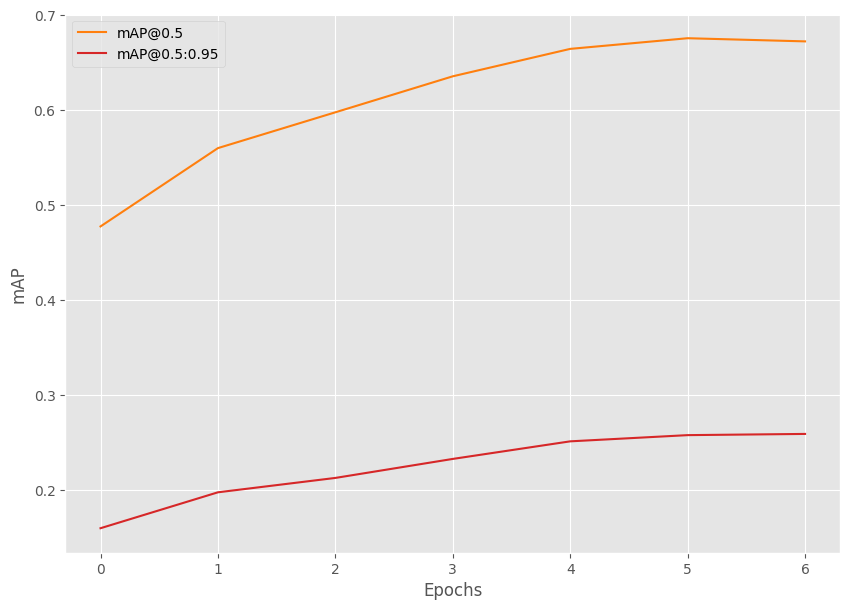

In [5]:
os.makedirs('outputs', exist_ok=True)
train_dataset = create_train_dataset(TRAIN_DIR)
valid_dataset = create_valid_dataset(VALID_DIR)
train_loader = create_train_loader(train_dataset, NUM_WORKERS)
valid_loader = create_valid_loader(valid_dataset, NUM_WORKERS)
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of validation samples: {len(valid_dataset)}\n")

# Initialize the model and move to the computation device.
model = create_model(num_classes=NUM_CLASSES, weights_path=WEIGHTS_PATH)
model = model.to(DEVICE)
# print(model)

# Total parameters and trainable parameters.
total_params = sum(p.numel() for p in model.parameters())
print(f"{total_params:,} total parameters.")
total_trainable_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad)
print(f"{total_trainable_params:,} training parameters.")
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9, nesterov=True)
scheduler = StepLR(
    optimizer=optimizer, step_size=15, gamma=0.1, verbose=True
)

# To monitor training loss
train_loss_hist = Averager()
# To store training loss and mAP values.
train_loss_list = []
map_50_list = []
map_list = []

# Mame to save the trained model with.
MODEL_NAME = 'model'

# Whether to show transformed images from data loader or not.
if VISUALIZE_TRANSFORMED_IMAGES:
    from custom_utils import show_tranformed_image
    show_tranformed_image(train_loader)

# To save best model.
save_best_model = SaveBestModel()

metric = MeanAveragePrecision()

# Training loop.
for epoch in range(NUM_EPOCHS):
    print(f"\nEPOCH {epoch+1} of {NUM_EPOCHS}")

    # Reset the training loss histories for the current epoch.
    train_loss_hist.reset()

    # Start timer and carry out training and validation.
    start = time.time()
    train_loss = train(train_loader, model)
    metric_summary = validate(valid_loader, model)
    print(f"Epoch #{epoch+1} train loss: {train_loss_hist.value:.3f}")   
    print(f"Epoch #{epoch+1} mAP: {metric_summary['map']}")   
    end = time.time()
    print(f"Took {((end - start) / 60):.3f} minutes for epoch {epoch}")

    train_loss_list.append(train_loss)
    map_50_list.append(metric_summary['map_50'])
    map_list.append(metric_summary['map'])

    # save the best model till now.
    save_best_model(
        model, float(metric_summary['map']), epoch, 'outputs'
    )
    # Save the current epoch model.
    save_model(epoch, model, optimizer)

    # Save loss plot.
    save_loss_plot(OUT_DIR, train_loss_list)

    # Save mAP plot.
    save_mAP(OUT_DIR, map_50_list, map_list)